#Group 3: Mfolozi Dlamini, Wally Dryden, Jonathan Ting, David Rider, Kyle Guillen

###BSAN 6080: Sprint 2: Data Exploration
###April 12, 2022

####1. Importing Packages

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from matplotlib.pyplot import figure
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

####2. Reading in the dataset

In [3]:
data = pd.read_excel('/content/group3_data.xlsx')

####3. General information and statistics of data


In [4]:
#Display the head of the data
data

,unix_time_start,event,browser_received_count,server_received_count,total_count
0,2022-03-31 17:00:00,PageView,17,0,17
1,2022-03-31 18:00:00,PageView,10,0,10
2,2022-03-31 19:00:00,PageView,1,0,1
3,2022-03-31 20:00:00,PageView,1,0,1
4,2022-03-31 21:00:00,PageView,1,0,1
...,...,...,...,...,...
144,2022-04-11 18:00:00,PageView,14,0,14
145,2022-04-11 19:00:00,PageView,23,0,23
146,2022-04-11 20:00:00,PageView,3,0,3
147,2022-04-11 21:00:00,PageView,3,0,3


In [5]:
#Showing the shape of our data (rows x columns)
data.shape

(149, 5)

In [6]:
#Check to see if our data has any null values
data.isnull().sum()

unix_time_start           0
event                     0
browser_received_count    0
server_received_count     0
total_count               0
dtype: int64

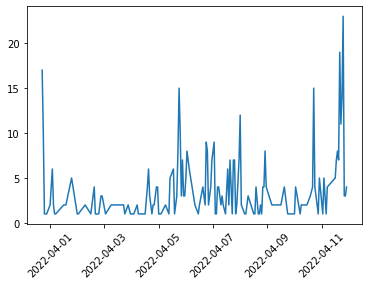

In [7]:
#Since there are no null values we can move ahead with our EDA
x = data['unix_time_start']
y = data['browser_received_count']
plt.plot(x,y)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

**We see that theres a lot of random variation with our website traffic from the above plot (random oscillation up and down)**

In [8]:
#we see that theres a lot of random variation with our website traffic from the above plot(random oscillation 
#up and down)

#now we want to see our top 3 days
data.nlargest(3,'total_count')


,unix_time_start,event,browser_received_count,server_received_count,total_count
145,2022-04-11 19:00:00,PageView,23,0,23
142,2022-04-11 16:00:00,PageView,19,0,19
0,2022-03-31 17:00:00,PageView,17,0,17


**Further insight shows that our top 3 days for user traffic were** 
- 2022/04/11 at 19:00:00
- 2022/04/11 at 16:00:00
- 2022/03/31 at 17:00:00**

####Now we look deeper at the data from our Google Analytics

Text(0, 0.5, 'Users')

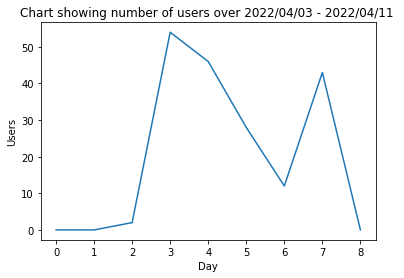

In [14]:
df_users_per_day = pd.read_excel('/content/group3_analytics.xlsx',sheet_name='visits')
df_users_per_day.head()
x = df_users_per_day['Day']
y = df_users_per_day['Users']
plt.plot(x,y)
plt.title('Chart showing number of users over 2022/04/03 - 2022/04/11 ')
plt.xlabel('Day')
plt.ylabel('Users')

**For the week beginning 2022/04/03 to 2022/04/11 we can see that our website traffic peaked on Day 3. It is important to note that there is still a lot of random variation and our data is not sufficient enough at this stage to have a full picture.**

Text(0, 0.5, 'New Users')

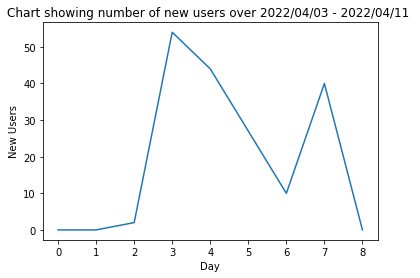

In [16]:
df_new_users = pd.read_excel('/content/group3_analytics.xlsx',sheet_name='new_users')
df_new_users.head()
x= df_new_users['Day']
y=df_new_users['New users']
plt.plot(x,y)
plt.title('Chart showing number of new users over 2022/04/03 - 2022/04/11 ')
plt.xlabel('Day')
plt.ylabel('New Users')

**Similarly with new user traffic we can see that the peak occured on day 3 within the specified time period.**

Text(0, 0.5, 'Average engagement time')

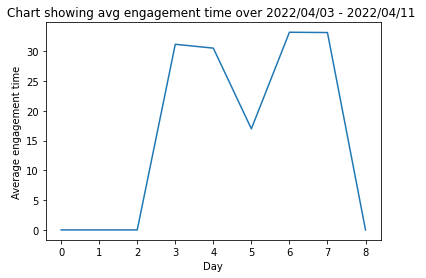

In [17]:
df_avg_engagement_time = pd.read_excel('/content/group3_analytics.xlsx',sheet_name='average_engagement_time')
df_avg_engagement_time.head()
x=df_avg_engagement_time['Day']
y=df_avg_engagement_time['Average engagement time']
plt.plot(x,y)
plt.title('Chart showing avg engagement time over 2022/04/03 - 2022/04/11 ')
plt.xlabel('Day')
plt.ylabel('Average engagement time')

**Our average engagement chart is quite interesting. We can make an inference that on the Days where our engagement time is highest is consequently the day where we have more user traffic to our ad. More importantly the more data we obtain over a longer period the more we can accurately predict longer engagement time for the users and make inferences based on those.**

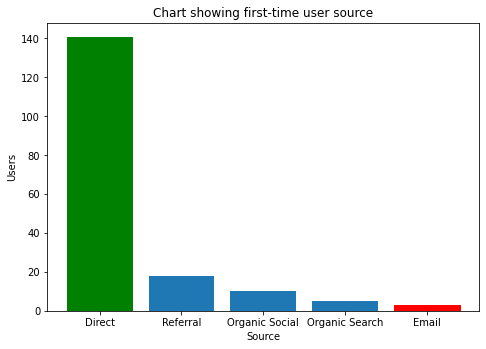

In [32]:
df_first_users_source = pd.read_excel('/content/group3_analytics.xlsx',sheet_name='first_users_source')
df_first_users_source.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = df_first_users_source['First user default channel grouping']
y = df_first_users_source['New users']
graph =ax.bar(x,y)
graph[0].set_color('g')
graph[4].set_color('r')
plt.title('Chart showing first-time user source')
plt.xlabel('Source')
plt.ylabel('Users')
plt.show()

**The graph above shows the numbers of user traffic to our ad via source. We have 5 sources Direct, Refferal, Organic Social, Organic Search as well as Email. We observed that over the specified time period a huge proportion of our user traffic came from the Direct Channel and the least came from the Email channel**

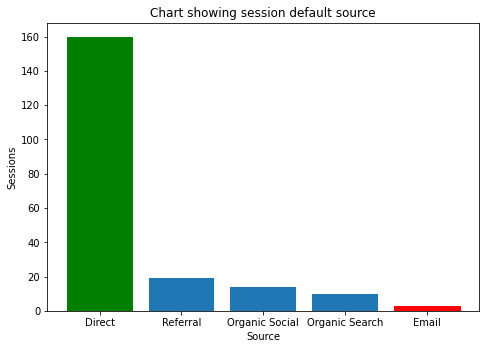

In [31]:
df_reg_users_source = pd.read_excel('/content/group3_analytics.xlsx',sheet_name='reg_users_source')
df_reg_users_source.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = df_reg_users_source['Session default channel grouping']
y = df_reg_users_source['Sessions']
graph=ax.bar(x,y)
graph[0].set_color('g')
graph[4].set_color('r')
plt.title('Chart showing session default source')
plt.xlabel('Source')
plt.ylabel('Sessions')
plt.show()

**Similar results are shown below for the sessions information for users interacting with our ad.**

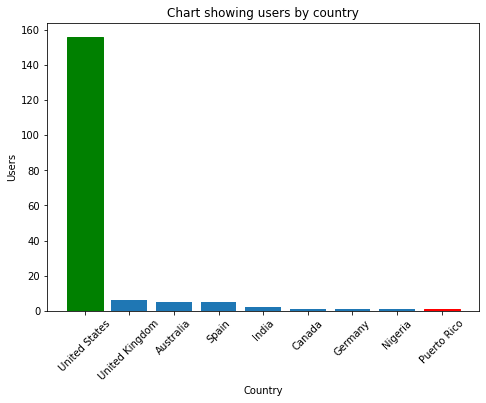

In [24]:
df_country = pd.read_excel('/content/group3_analytics.xlsx',sheet_name='country')
df_country.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = df_country['Country']
y = df_country['Users']
graph =ax.bar(x,y)
plt.xticks(rotation = 45)
graph[0].set_color('g')
graph[8].set_color('r')
plt.title('Chart showing users by country')
plt.xlabel('Country')
plt.ylabel('Users')
plt.show()

**As expected a majority of our user traffic comes from the United States. This makes sense in light of our main target market with the ad for the College Ventures Network conference being hosted in the United States. It is important to note other global reach from essentially every continent on the globe except South America.**

,Day,30 days,7 days,1 day
0,0,0,0,0
1,1,0,0,0
2,2,2,2,2
3,3,56,56,54
4,4,100,100,46


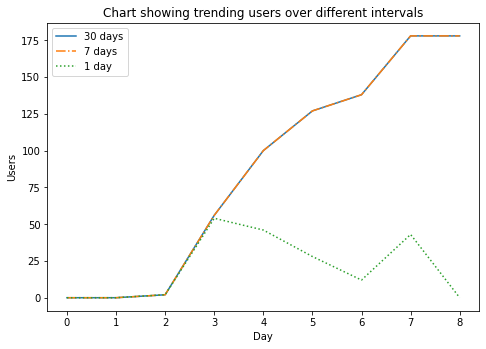

In [28]:
df_trending_users = pd.read_excel('/content/group3_analytics.xlsx',sheet_name='trending_users')
display(df_trending_users.head())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = df_trending_users['Day']
y1 = df_trending_users['30 days']
y2 = df_trending_users['7 days']
y3 = df_trending_users['1 day']

plt.plot(x,y1, label = "30 days", linestyle="-")
plt.plot(x,y2,label = "7 days", linestyle="-.")
plt.plot(x,y3,label = "1 day", linestyle=":")
plt.legend(loc="upper left")
plt.title('Chart showing trending users over different intervals')
plt.xlabel('Day')
plt.ylabel('Users')
plt.show()

**This chart is not that intuitive as is. The idea is to show case the number of users who remain active over a trailing period. The plan is to measure the the trailing periods in 30/7/1 day intervals.**

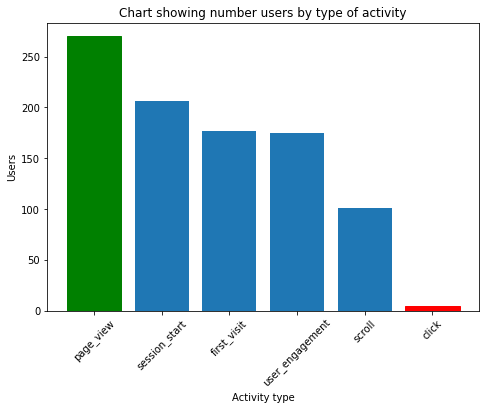

In [29]:
df_session_activity = pd.read_excel('/content/group3_analytics.xlsx',sheet_name='session_activity')
df_session_activity.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = df_session_activity['Event name']
y = df_session_activity['Event count']
graph = ax.bar(x,y)
graph[0].set_color('g')
graph[5].set_color('r')
plt.xticks(rotation = 45)
plt.title('Chart showing number users by type of activity')
plt.xlabel('Activity type')
plt.ylabel('Users')
plt.show()

**Finally our last visual in the data exploration has to do with the activity type of the users traffic on our ad. By far most users only do page-view. Based on our main hypothesis for this project to promote the Conference for College Ventures Network we would like to see the number of "Clicks" rise substantially as we try attract more people to the event.**